# Year Season Time Series 

| Northern hemisphere | Southern hemisphere | Start date |	End date|  
|---------------------|---------------------|------------|----------|
| Winter | 	Summer 	  | 1 December |	28 February |
| Spring | 	Autumn 	  | 1 March    |    31 May  |
| Summer |	Winter 	  | 1 June 	   | 31 August  |
| Autumn 	| Spring 	| 1 September 	|30 November   |

https://en.wikipedia.org/wiki/Season

**Steps**

1. Detectar si hubo o no WE por semana
2. Contar NMAX de valores posibles por mes
3. contar NVAL num de valores validos por mes
4. Contar NWE num de we por mes
5. (NWE/NVAL)*NMAX nos da una aproximacion de weekend effect por mes
6. Hacer esto mismo pero por estaciones meteorologicas del ano

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [16.4, 6.8] 

In [225]:
stations = ["CUA","FAC", "MER", "MON", "PED", "SAG","TAH","TLA","UIZ","XAL"]
f = "Diferencias SUN-WED.csv"
s = pd.read_csv(f)

# indicar el formato de la fecha en el que esta el csv
s['date'] = pd.to_datetime(s['date'],format = '%d/%m/%Y %H:%M')
s = s.set_index('date')

In [226]:
# take into account from the last month of 1993 that is the start of meteorological winter
dateFrom = pd.to_datetime('1993-12-01' )
OW1 = s[s.index>=dateFrom][stations]

In [233]:
NMAX = OW1.isnull().resample("M").count()
NVAL = OW1.resample("M").count()

#numero maximo de valores de we al mes
NMAX.head()

CUA  FAC  MER  MON  PED  SAG  TAH  TLA  UIZ  XAL
date                                                        
1993-12-31    5    5    5    5    5    5    5    5    5    5
1994-01-31    4    4    4    4    4    4    4    4    4    4
1994-02-28    4    4    4    4    4    4    4    4    4    4
1994-03-31    5    5    5    5    5    5    5    5    5    5
1994-04-30    4    4    4    4    4    4    4    4    4    4

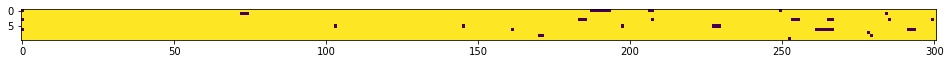

In [234]:
plt.imshow(NVAL.T>0)
plt.show()

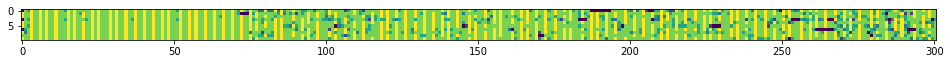

In [260]:
plt.imshow(NVAL[stations].T)

In [268]:
plt.imshow(NVAL[:71][stations].T)

In [271]:
NVAL[:71][stations]

CUA  FAC  MER  MON  PED  SAG  TAH  TLA  UIZ  XAL
date                                                        
1993-12-31    0    5    5    0    5    5    0    5    4    5
1994-01-31    4    4    4    4    4    4    3    2    4    4
1994-02-28    3    4    4    3    4    3    4    4    4    4
1994-03-31    5    5    5    5    5    5    5    5    5    5
1994-04-30    4    4    4    4    4    4    4    4    4    4
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1999-06-30    5    5    5    5    5    5    5    5    5    5
1999-07-31    4    4    4    4    4    4    4    4    4    4
1999-08-31    4    4    4    4    4    4    4    4    4    4
1999-09-30    5    5    5    5    5    5    5    5    5    5
1999-10-31    4    4    4    4    4    4    4    4    4    4

[71 rows x 10 columns]

CUA


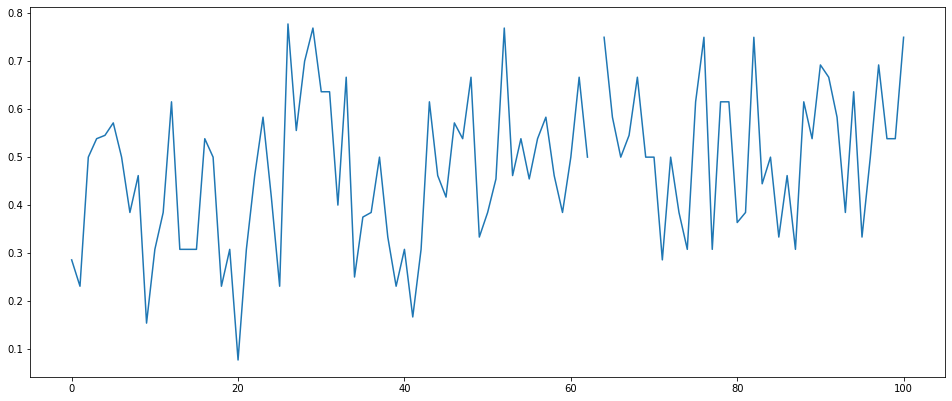

FAC


MER


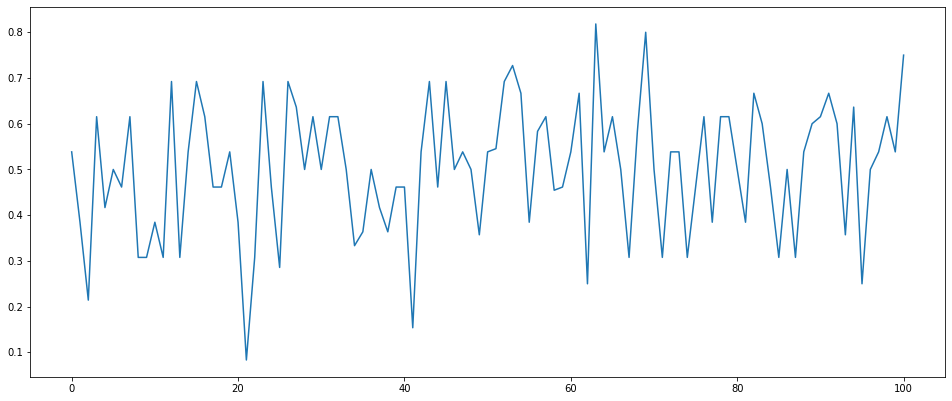

MON


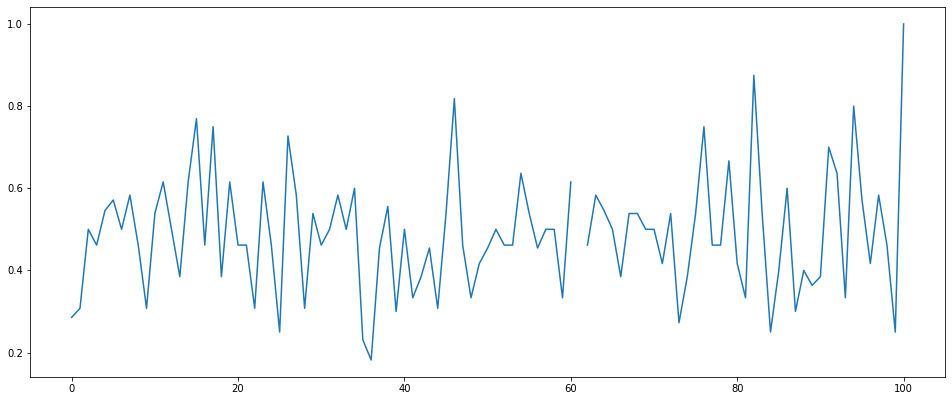

PED


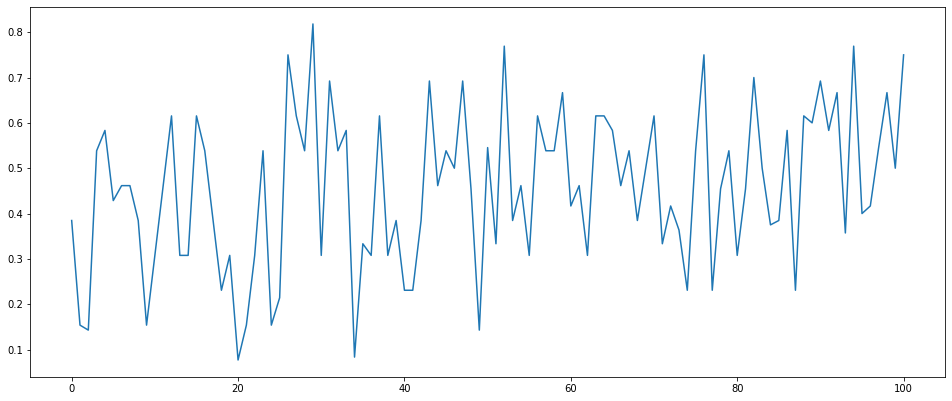

SAG


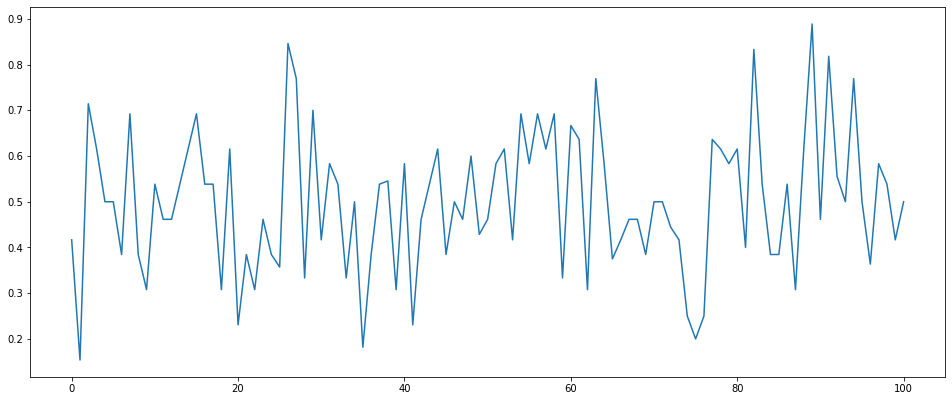

TAH


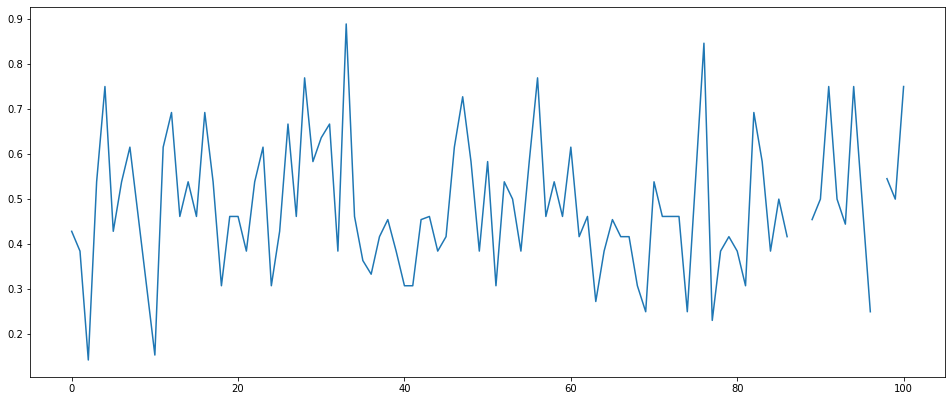

TLA


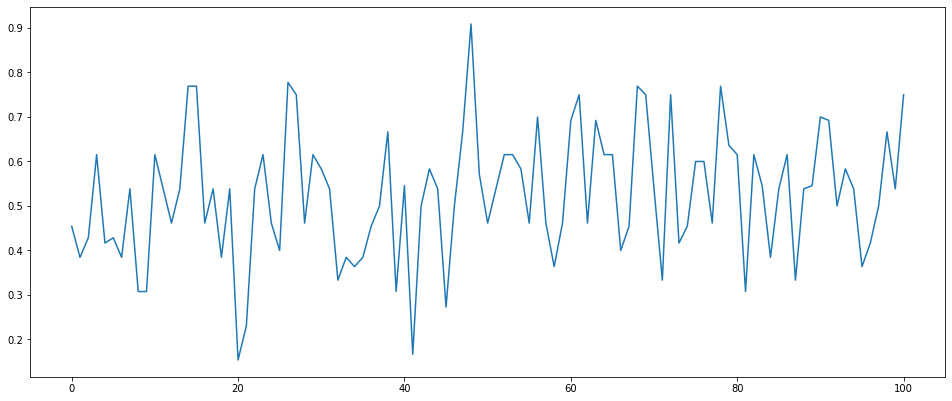

UIZ


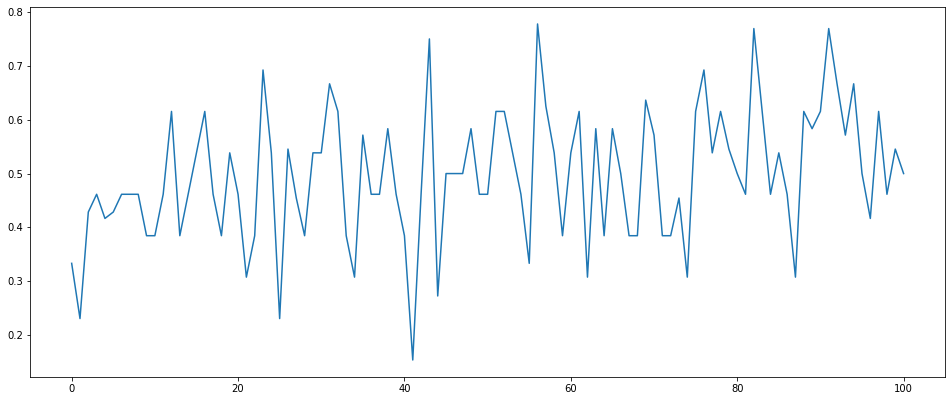

XAL


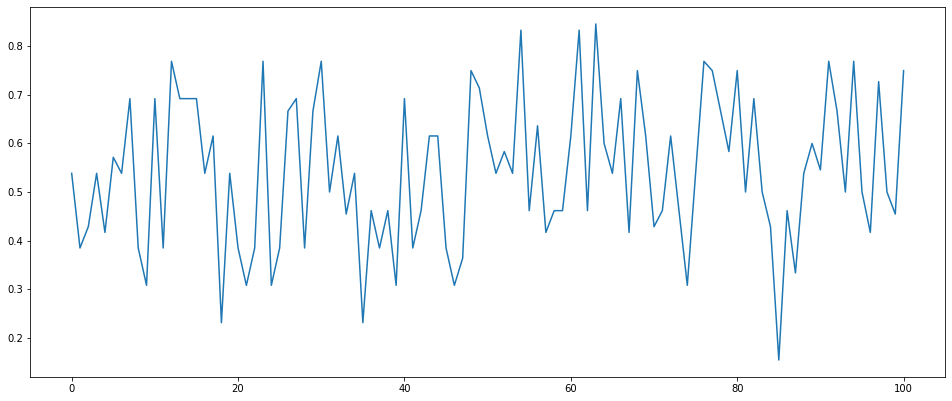

In [255]:
plt.rcParams["figure.figsize"] = [16.4, 6.8] 
seasonAssociation = np.arange(len(df.index))//3
NMAX["season"] = seasonAssociation
NVAL["season"] = seasonAssociation

we = OW1 > 0

#numerod e WE por mes
NWE = we.resample("M").sum()
NWE["season"] = seasonAssociation

#numero de WE cada estacion (Station) de tres meses
NWE_S = we_monthly.groupby("season").sum()

#numero de WE validos cada tres meses
NVAL_S = NVAL.groupby("season").sum()

#numero de WE maximo posibles cada tres meses
NMAX_S = NMAX.groupby("season").sum()

ratio = (NWE_S/NVAL_S)

for s in stations:
    print(s)
    plt.plot(ratio[s])
    plt.show()

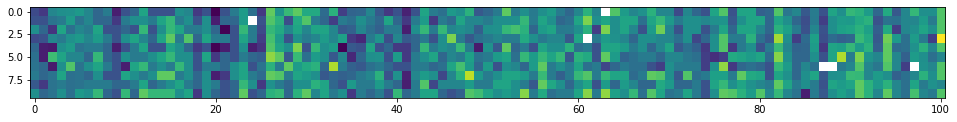

In [237]:
plt.imshow(ratio.T)
plt.show()

In [256]:
stations

['CUA', 'FAC', 'MER', 'MON', 'PED', 'SAG', 'TAH', 'TLA', 'UIZ', 'XAL']

In [252]:
NMAX

CUA  FAC  MER  MON  PED  SAG  TAH  TLA  UIZ  XAL  season
date                                                                
1993-12-31    5    5    5    5    5    5    5    5    5    5       0
1994-01-31    4    4    4    4    4    4    4    4    4    4       0
1994-02-28    4    4    4    4    4    4    4    4    4    4       0
1994-03-31    5    5    5    5    5    5    5    5    5    5       1
1994-04-30    4    4    4    4    4    4    4    4    4    4       1
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...
2018-08-31    5    5    5    5    5    5    5    5    5    5      98
2018-09-30    4    4    4    4    4    4    4    4    4    4      99
2018-10-31    5    5    5    5    5    5    5    5    5    5      99
2018-11-30    4    4    4    4    4    4    4    4    4    4      99
2018-12-31    4    4    4    4    4    4    4    4    4    4     100

[301 rows x 11 columns]

## Apendice

In [211]:
# Numero maximo de mediciones posibles por mes incluyendo los nan (validos + no validos)
tvals = oweofinterest.isnull().resample("M").count()

# Numero de valores validos por mes
tvalidvals = oweofinterest.resample("M").count()

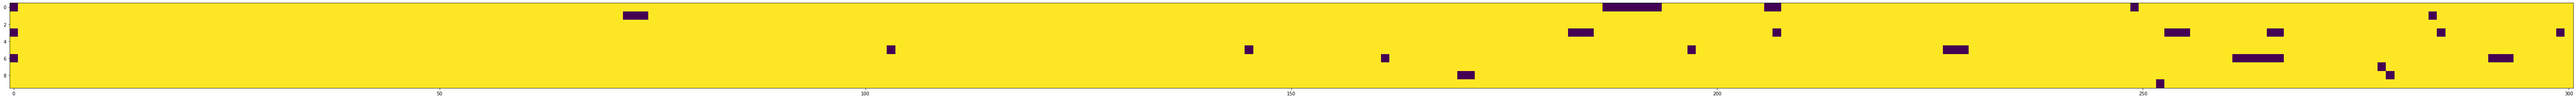

In [212]:
plt.rcParams["figure.figsize"] = [100, 100] 
plt.imshow(tvalidvals[stations].T>0)
plt.show()

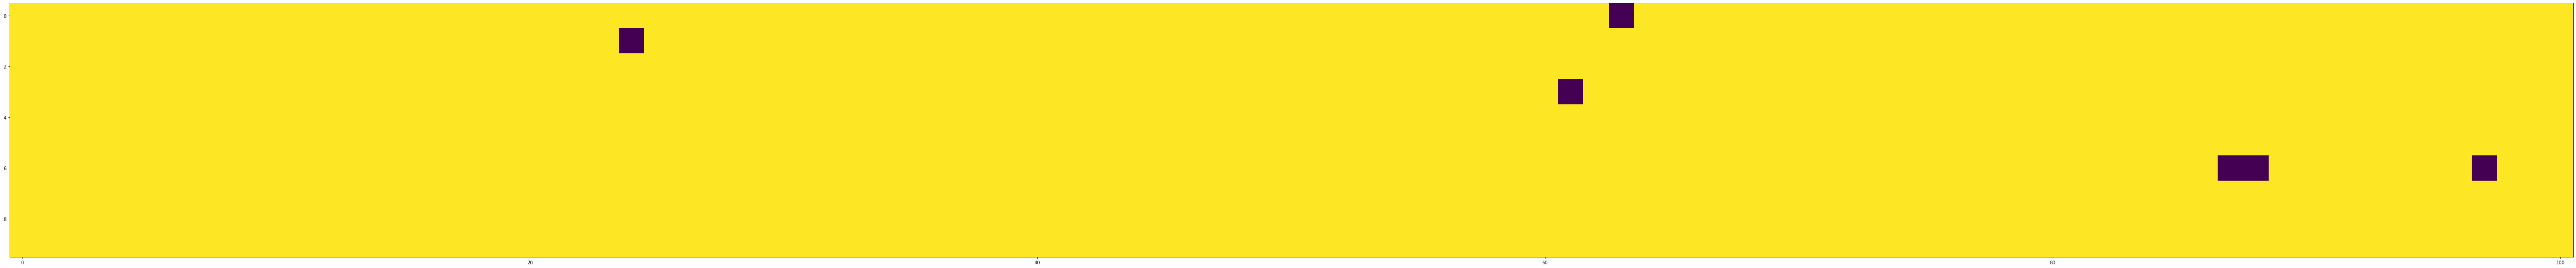

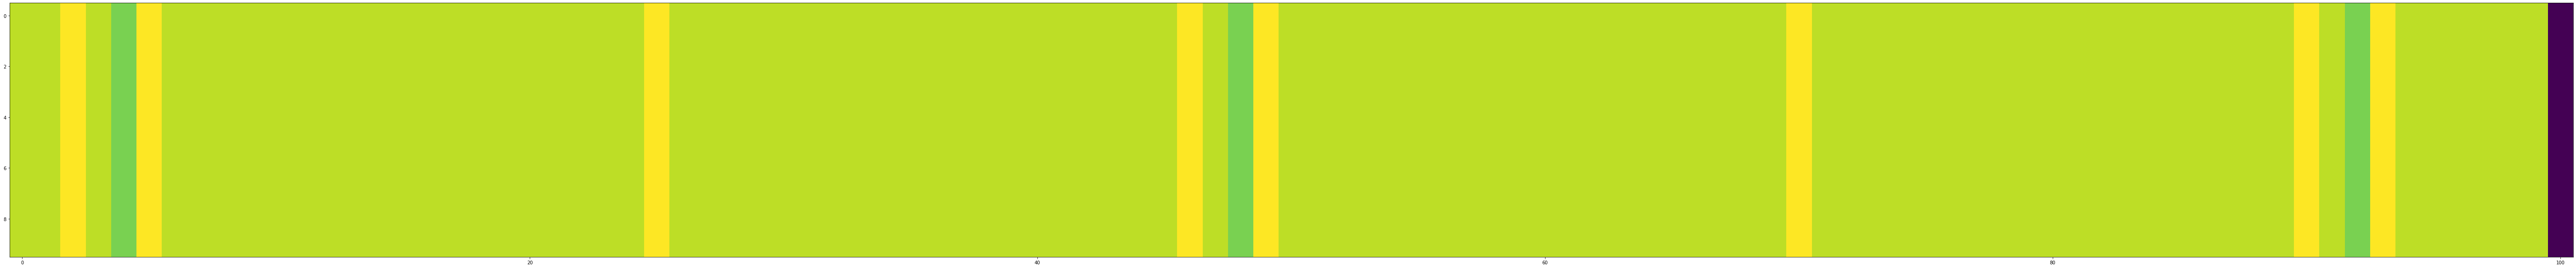

In [213]:
seasonAssociation = np.arange(len(df.index))//3
tvals["season"] =  seasonAssociation
tvalidvals["season"] =  seasonAssociation

tvalidvals_season = tvalidvals.groupby("season").sum()[stations]
tvals_season = tvals.groupby("season").sum()[stations]

# agrupar los count y sumarlos cada 3 meses de valores validos. (puede que en tres meses consecutivos no exista un valor valido)
plt.imshow(tvalidvals.groupby("season").sum()[stations].T>0)
plt.show()

# maximo numero de valores que pueden ser registrados (no deberia haber nan's, la ultima estacion queda incompleta)
plt.imshow(tvals_season.groupby("season").sum()[stations].T)
plt.show()

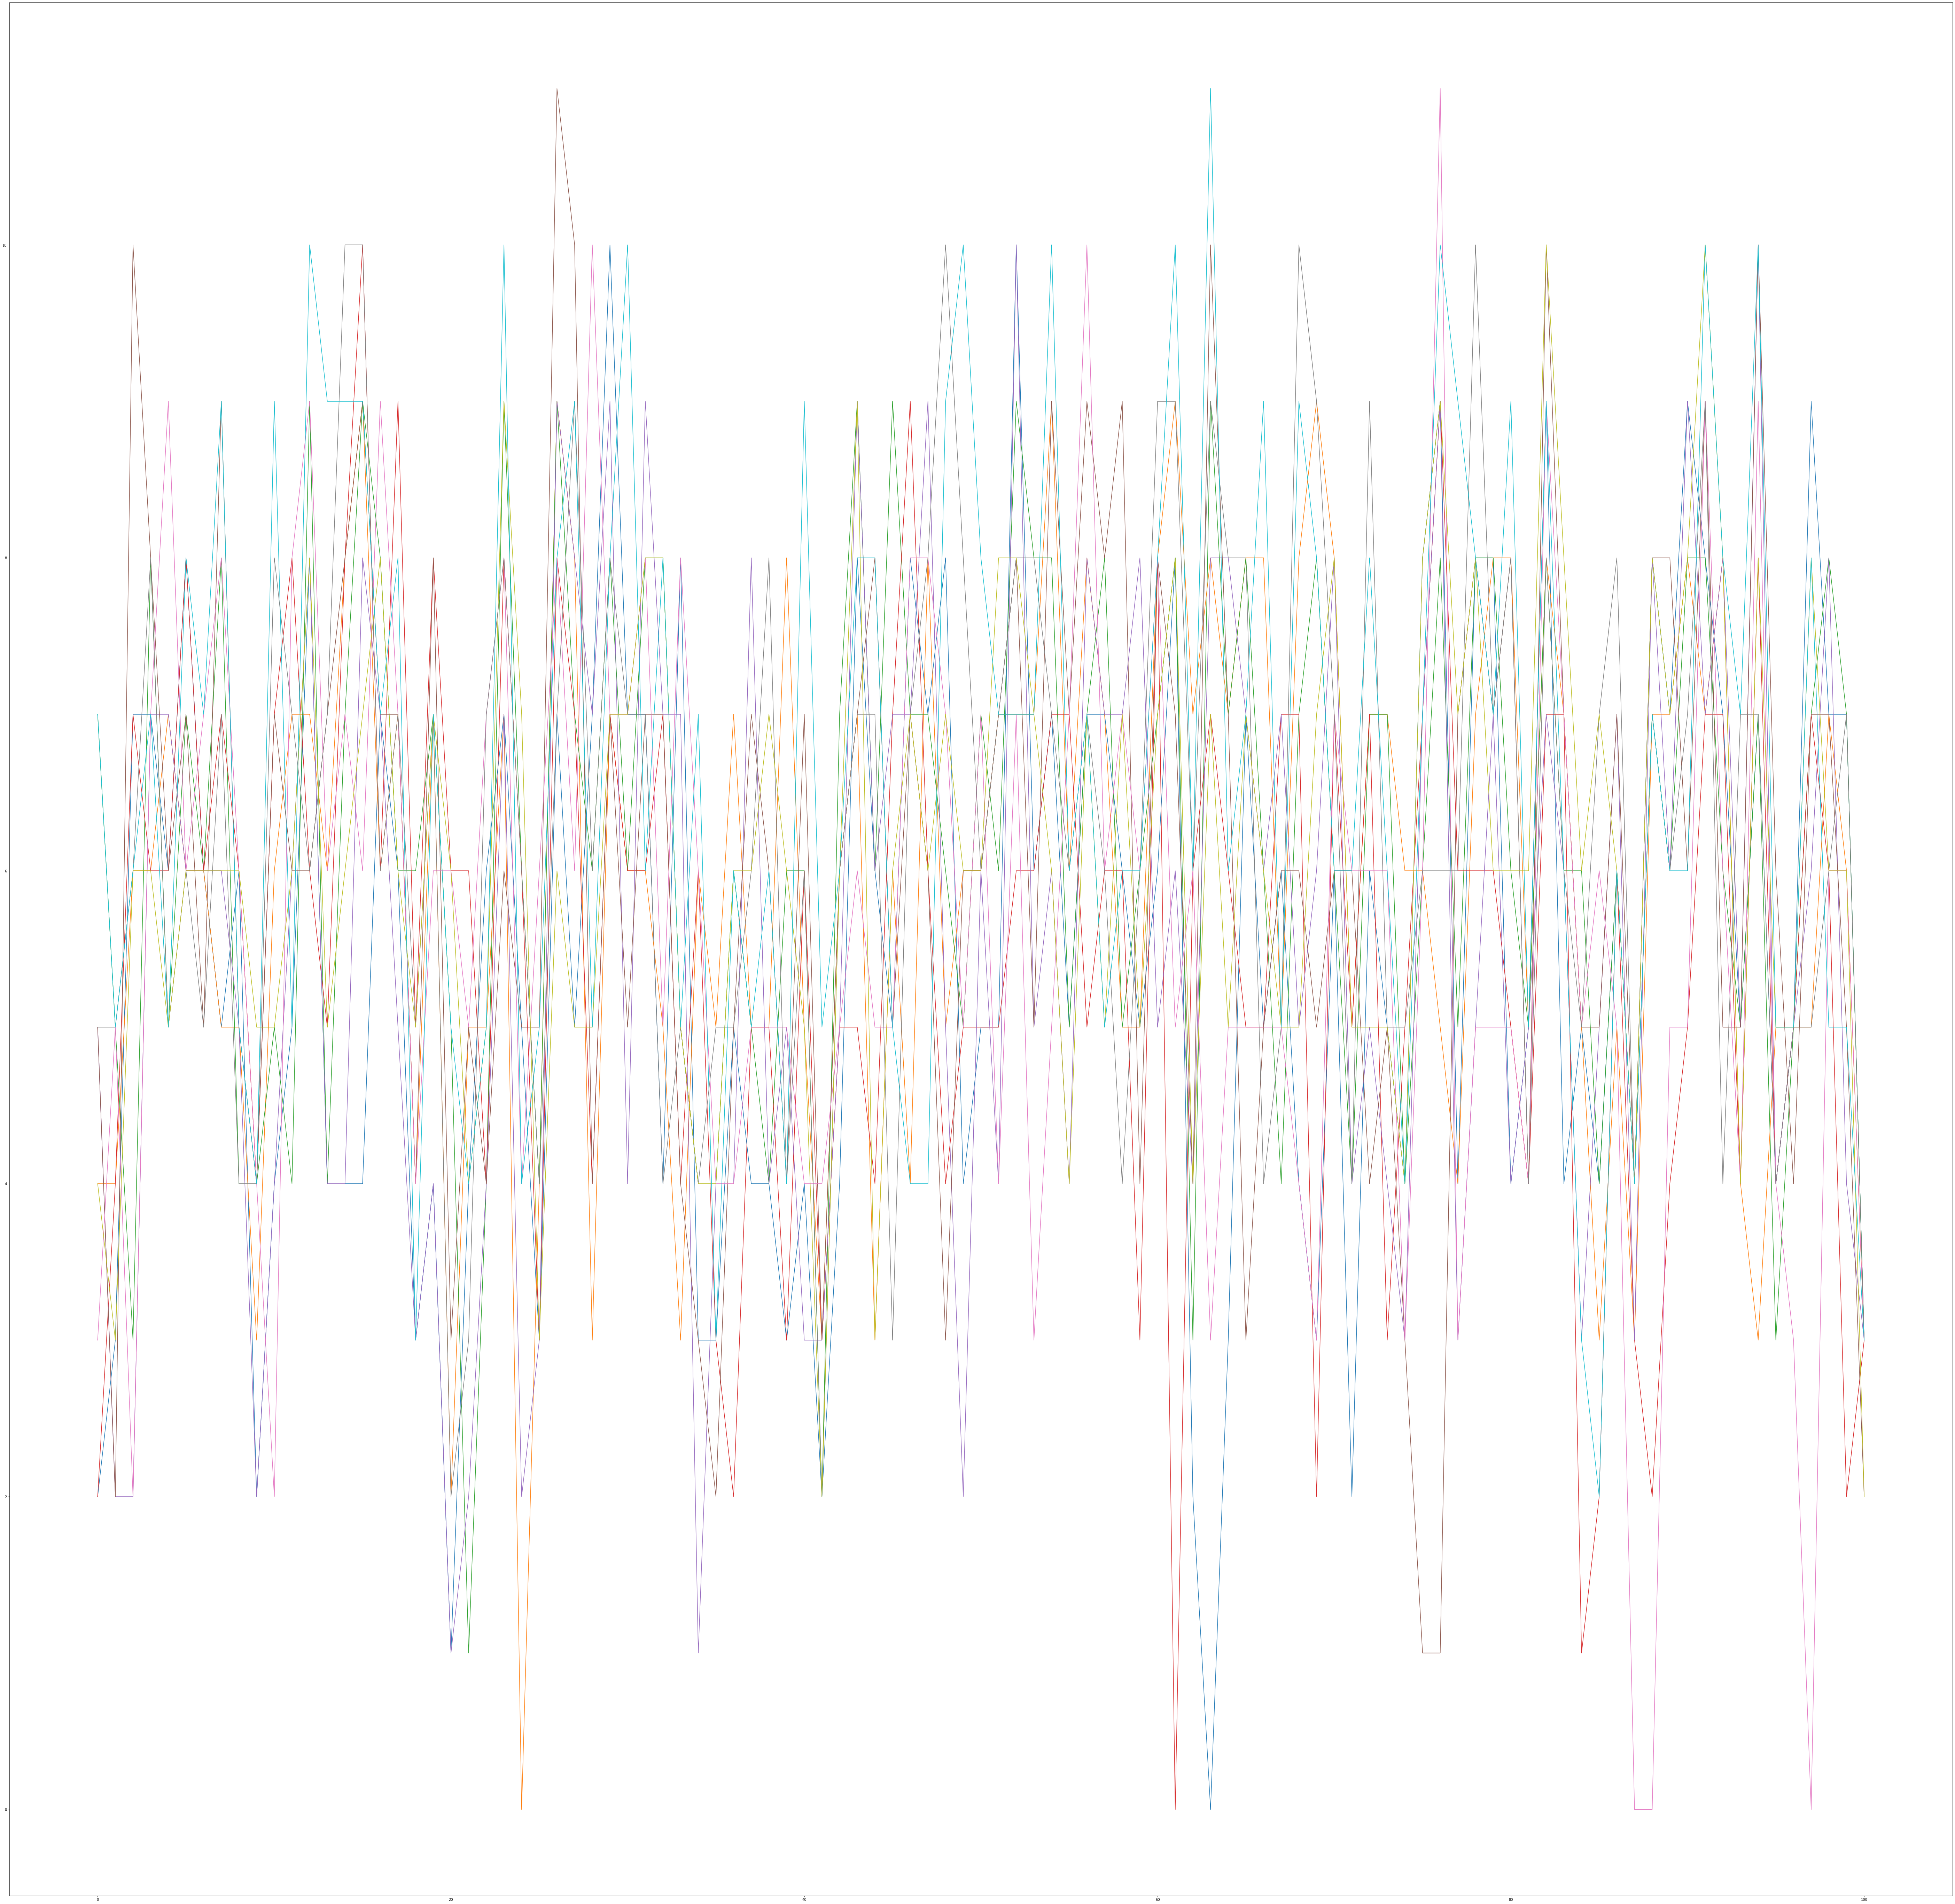

In [135]:
# detectar we por semana
# contar los we por mes
# contar los we por estacion (suma de 3 meses)

# OWE filtering (max(sum) - max(wed)>0). we take just the values >0 as true
#we by week
we = OW1 > 0

# monthly we registered 
sum_we = we.resample("M").sum()

#season we 
sum_we["season"] =  seasonAssociation


nwebyseason = sum_we.groupby("season").sum()[stations]


#nwebyseason / validdataforeachseason

plt.plot((nwebyseason/tvals_season)*tvals_season)

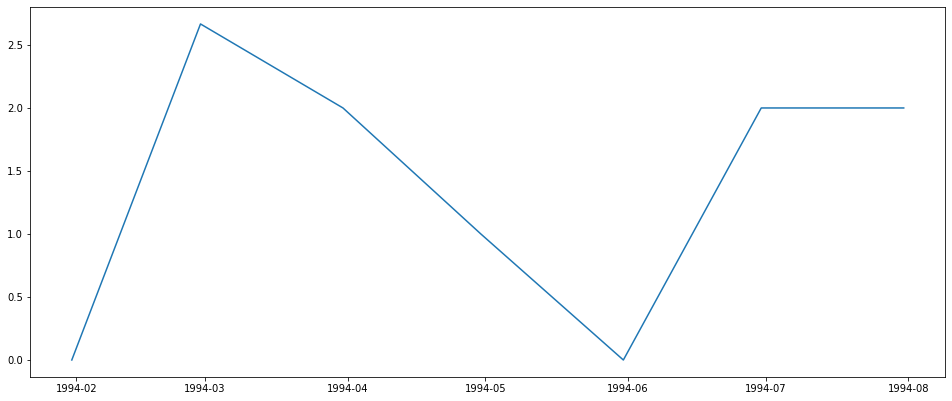

In [38]:


# we ratio according the valid data
we_ratio = sum_we / tvalidvals

# escalar por el numero total de datos para obtener la estimacion de weekend effect por mes, asumiendo que la variable aleatoria es uniforme
estimated_we_month = we_ratio * tvals

#Graficar ejemplo "MER"
plt.plot(estimated_we_month["CUA"][:8])

In [33]:
estimated_we_month

MER       PED       SAG       TLA       XAL   FAC       UIZ  \
date                                                                      
1993-12-31  3.0  3.000000  3.000000  2.000000  3.000000  2.00  2.500000   
1994-01-31  1.0  0.000000  0.000000  2.000000  1.000000  0.00  0.000000   
1994-02-28  3.0  2.000000  2.666667  2.000000  3.000000  2.00  2.000000   
1994-03-31  2.0  1.000000  0.000000  2.000000  1.000000  2.00  1.000000   
1994-04-30  2.0  1.000000  1.000000  1.000000  3.000000  1.00  1.000000   
...         ...       ...       ...       ...       ...   ...       ...   
2018-08-31  4.0  3.000000  4.000000  3.333333  3.333333  3.75  3.000000   
2018-09-30  2.0  2.000000  2.000000  2.000000  1.333333  2.00  2.000000   
2018-10-31  2.0  1.666667  1.000000  1.000000  2.000000  1.00  1.666667   
2018-11-30  3.0  2.666667  2.666667  4.000000  2.666667  3.00  3.000000   
2018-12-31  3.0  3.000000  2.000000  3.000000  3.000000  3.00  2.000000   

                 CUA       MON   TAH  ...  TPN  SUR  AZC       CES  PLA  LAG  \
date                                  ...                                      
1993-12-31       NaN       NaN   NaN  ...  NaN  NaN  2.0  1.000000  3.0  2.0   
1994-01-31  0.000000  0.000000  0.00  ...  0.0  NaN  0.0  0.000000  0.0  1.0   
1994-02-28  2.666667  2.666667  3.00  ...  2.0  NaN  2.0  1.333333  2.0  3.0   
1994-03-31  2.000000  2.000000  1.00  ...  1.0  NaN  2.0  2.000000  0.0  2.0   
1994-04-30  1.000000  2.000000  3.00  ...  1.0  NaN  2.0  1.000000  1.0  2.0   
...              ...       ...   ...  ...  ...  ...  ...       ...  ...  ...   
2018-08-31  3.000000  3.000000  2.50  ...  NaN  NaN  NaN       NaN  NaN  NaN   
2018-09-30  2.000000  1.000000  2.00  ...  NaN  NaN  NaN       NaN  NaN  NaN   
2018-10-31  2.000000  1.250000  1.25  ...  NaN  NaN  NaN       NaN  NaN  NaN   
2018-11-30  3.000000       NaN  3.00  ...  NaN  NaN  NaN       NaN  NaN  NaN   
2018-12-31  3.000000  4.000000  3.00  ...  NaN  NaN  NaN       NaN  NaN  NaN   

            TAC  TAX  HAN  semana  
date                               
1993-12-31  3.0  2.0  3.0     0.0  
1994-01-31  0.0  0.0  1.0     0.0  
1994-02-28  2.0  3.0  2.0     0.0  
1994-03-31  2.0  2.0  0.0     0.0  
1994-04-30  3.0  1.0  1.0     0.0  
...         ...  ...  ...     ...  
2018-08-31  NaN  NaN  NaN     0.0  
2018-09-30  NaN  NaN  NaN     0.0  
2018-10-31  NaN  NaN  NaN     0.0  
2018-11-30  NaN  NaN  NaN     0.0  
2018-12-31  NaN  NaN  NaN     0.0  

[301 rows x 44 columns]

In [32]:
df = estimated_we_month
B = df.groupby(np.arange(len(df.index))//3, axis=0).sum()
B

MER       PED        SAG       TLA        XAL   FAC       UIZ       CUA  \
0    7.0  5.000000   5.666667  6.000000   7.000000  4.00  4.500000  2.666667   
1    5.0  2.000000   2.000000  5.000000   5.000000  4.00  3.000000  3.000000   
2    3.0  2.000000  10.000000  6.000000   6.000000  6.00  6.000000  7.000000   
3    8.0  7.000000   8.000000  8.000000   7.000000  6.00  6.000000  7.000000   
4    5.0  7.000000   6.000000  5.000000   5.000000  7.00  5.000000  6.333333   
..   ...       ...        ...       ...        ...   ...       ...       ...   
96   6.5  5.333333   5.000000  5.333333   5.500000  5.00  5.333333  6.500000   
97   7.0  7.083333   7.666667  5.000000  10.000000  5.00  8.000000  9.000000   
98   8.0  8.666667   7.000000  8.333333   6.666667  7.75  6.000000  7.000000   
99   7.0  6.333333   5.666667  7.000000   6.000000  6.00  6.666667  7.000000   
100  3.0  3.000000   2.000000  3.000000   3.000000  3.00  2.000000  3.000000   

          MON       TAH  ...  TPN  SUR  AZC       CES       PLA  LAG  TAC  \
0    2.666667  3.000000  ...  2.0  0.0  4.0  2.333333  5.000000  6.0  5.0   
1    4.000000  5.000000  ...  3.0  0.0  5.0  5.000000  2.000000  5.0  6.0   
2    7.000000  2.000000  ...  3.0  0.0  6.0  4.000000  2.333333  4.0  6.0   
3    6.000000  7.000000  ...  6.0  0.0  6.0  7.000000  6.000000  7.0  7.0   
4    6.666667  9.000000  ...  6.0  0.0  5.0  5.000000  6.000000  5.0  5.0   
..        ...       ...  ...  ...  ...  ...       ...       ...  ...  ...   
96   5.333333  3.000000  ...  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
97   7.500000  0.000000  ...  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
98   6.000000  7.166667  ...  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
99   2.250000  6.250000  ...  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
100  4.000000  3.000000  ...  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   

     TAX  HAN  semana  
0    5.0  6.0     0.0  
1    5.0  2.0     0.0  
2    2.0  3.0     0.0  
3    6.0  7.0     0.0  
4    7.0  6.0     0.0  
..   ...  ...     ...  
96   0.0  0.0     0.0  
97   0.0  0.0     0.0  
98   0.0  0.0     0.0  
99   0.0  0.0     0.0  
100  0.0  0.0     0.0  

[101 rows x 44 columns]

In [8]:
A = tvals.groupby(np.arange(len(tvals.index))//3, axis=0).sum()

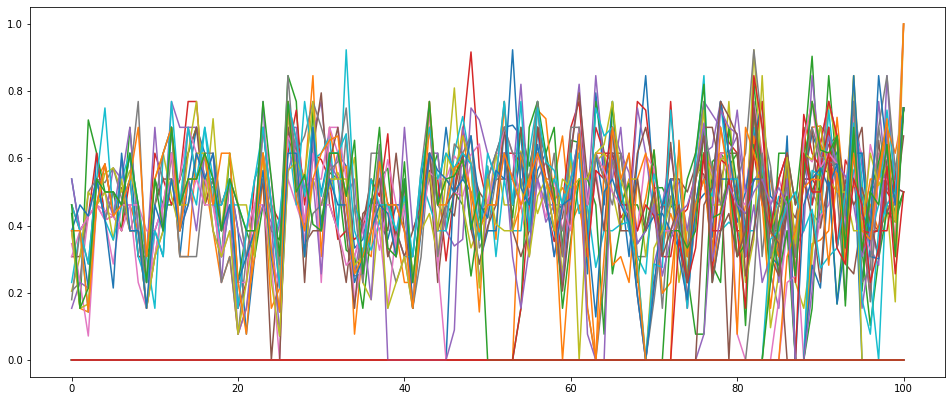

In [9]:
plt.plot(B/A)
plt.show()

In [10]:
monthly = s.resample("3M").mean()

In [11]:
for st in stations:
    print(st)
#    nulls = np.sum(monthly[st][-4*(2018-1993):].isnull())
#    print(s, ":", nulls)
    
    plt.plot(monthly[st][-4*(2018-1993):])

#plt.plot(monthly["TLA"])
#plt.plot(monthly["SAG"])

CUA
FAC
MER
MON
PED
SAG
TAH
TLA
UIZ
XAL


In [12]:
monthly[st][-4*(2018-1993):]

date
1994-04-30   -10.307692
1994-07-31   -15.692308
1994-10-31     4.538462
1995-01-31    -2.307692
1995-04-30     8.307692
                ...    
2018-01-31    -2.333333
2018-04-30    -0.300000
2018-07-31     4.583333
2018-10-31    -4.090909
2019-01-31    21.714286
Freq: 3M, Name: XAL, Length: 100, dtype: float64

**Referencias**

https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr

In [13]:
np.sum(monthly[stations[0]][-4*(2018-1993):].isnull())

2

In [14]:
monthly[stations][-4*(2018-1993):]

CUA        FAC        MER        MON        PED        SAG  \
date                                                                           
1994-04-30 -13.916667 -46.230769 -13.692308 -10.333333 -35.615385 -28.833333   
1994-07-31 -32.846154 -15.923077 -31.153846  -6.461538 -53.692308   3.384615   
1994-10-31   5.846154  13.307692  -2.769231   0.769231 -34.076923   4.846154   
1995-01-31  -6.153846   0.615385  17.153846   4.153846  -4.153846  10.230769   
1995-04-30  -5.166667 -15.230769  -7.461538  11.916667  -3.384615  -2.461538   
...               ...        ...        ...        ...        ...        ...   
2018-01-31  -4.363636  -3.307692   1.818182   0.142857  -5.846154  -4.500000   
2018-04-30  -3.250000 -17.333333  -0.636364  -1.545455  -6.181818   1.888889   
2018-07-31   7.000000  13.461538  -0.846154  -0.750000   6.090909  -7.000000   
2018-10-31  -5.500000  -0.692308  -0.071429  -1.538462  -7.800000  -3.714286   
2019-01-31  27.500000  37.250000  24.250000  41.333333  24.142857  24.428571   

                  TAH        TLA        UIZ        XAL  
date                                                    
1994-04-30   3.461538 -21.307692  -6.538462 -10.307692  
1994-07-31 -26.076923  -5.923077 -25.461538 -15.692308  
1994-10-31 -11.076923   4.076923 -18.153846   4.538462  
1995-01-31  23.923077  -2.692308   6.846154  -2.307692  
1995-04-30  10.615385 -17.538462  12.230769   8.307692  
...               ...        ...        ...        ...  
2018-01-31  -2.500000  -2.727273  -5.181818  -2.333333  
2018-04-30 -18.666667  -2.333333  -0.181818  -0.300000  
2018-07-31   1.714286  11.363636   1.461538   4.583333  
2018-10-31  -1.250000  -7.833333   3.416667  -4.090909  
2019-01-31  15.750000  32.125000  14.000000  21.714286  

[100 rows x 10 columns]

In [15]:
s[stations][-52*(2018-1993):]

CUA    FAC   MER    MON    PED   SAG   TAH    TLA    UIZ    XAL
date                                                                        
1994-02-02   NaN  -99.0  66.0  -13.0  -72.0  15.0  59.0   50.0  103.0   10.0
1994-02-09 -15.0 -159.0 -80.0    NaN -137.0   NaN -44.0 -173.0  -68.0 -124.0
1994-02-16  33.0   76.0  34.0   39.0   59.0  11.0   9.0   41.0  -13.0   85.0
1994-02-23  97.0   61.0   9.0   16.0   23.0 -36.0  43.0   -5.0   32.0    7.0
1994-03-02 -57.0  -36.0   8.0  -27.0  -42.0 -40.0  -9.0   30.0  -15.0   -4.0
...          ...    ...   ...    ...    ...   ...   ...    ...    ...    ...
2018-11-28  44.0   67.0  44.0    NaN   57.0  51.0  10.0   40.0   29.0    NaN
2018-12-05  43.0   70.0  23.0    NaN   18.0  27.0   5.0   55.0    7.0   35.0
2018-12-12  42.0   20.0   7.0   17.0    6.0  -5.0  32.0   26.0    0.0    4.0
2018-12-19  36.0   55.0  70.0  104.0   46.0  48.0  60.0   52.0   58.0   46.0
2018-12-26  -6.0   -6.0 -30.0    3.0  -22.0 -25.0 -24.0  -10.0  -31.0  -17.0

[1300 rows x 10 columns]

# Referencias

https://datatofish.com/strings-to-datetime-pandas/
https://stackoverflow.com/questions/46478518/groupby-dataframe-by-n-columns-or-n-rows

Promedio mensual

In [ ]:
Notas